<a href="https://colab.research.google.com/github/Sidqinabhan/Robotika/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving telu.png to telu (2).png


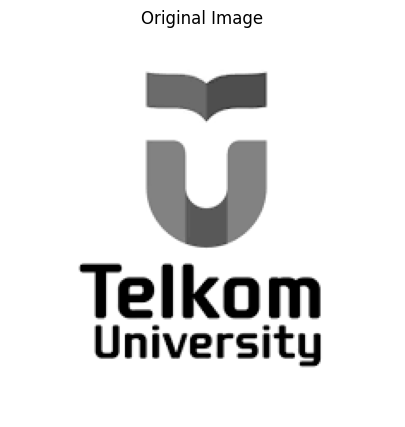

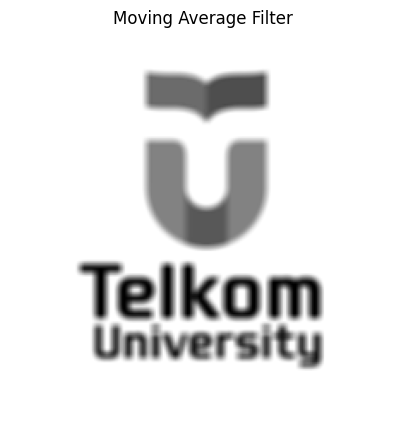

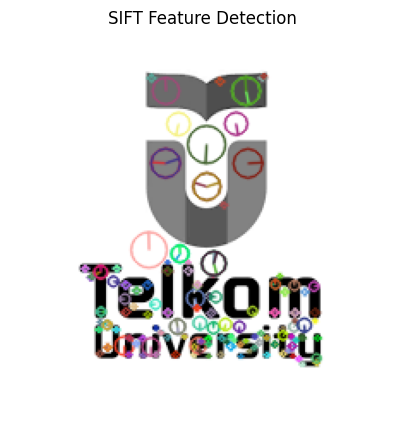

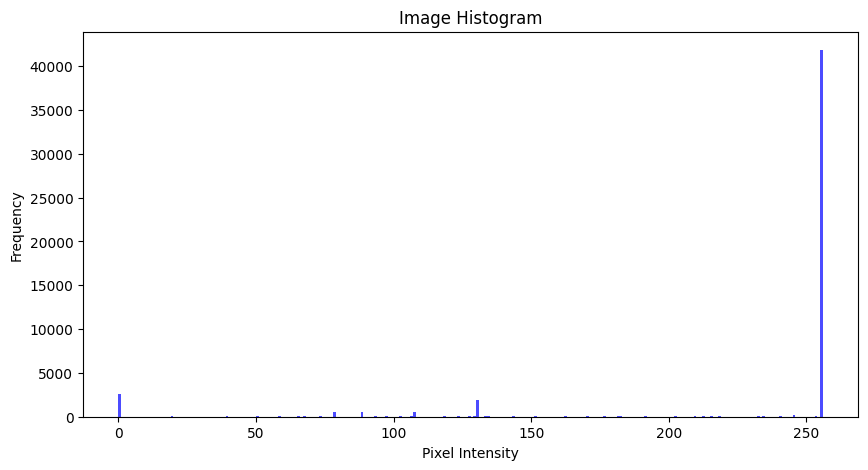

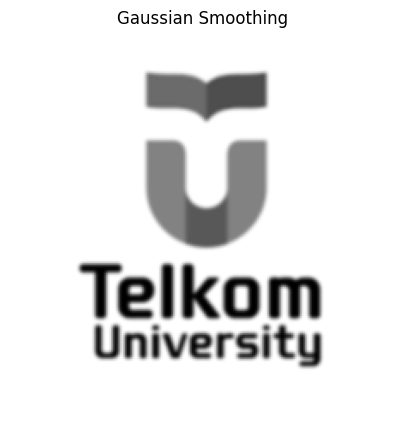

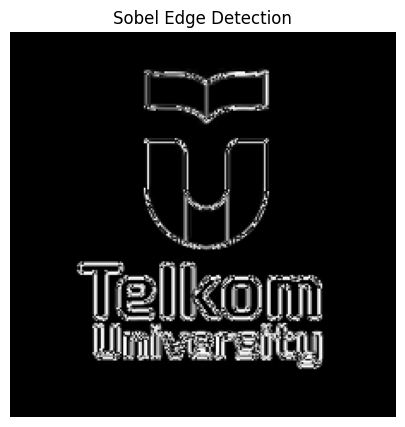

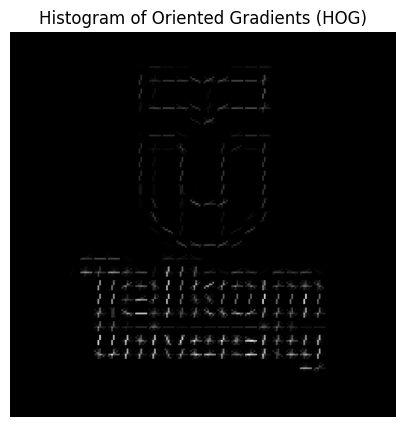

In [ ]:
# Import pustaka yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload gambar
from google.colab import files
uploaded = files.upload()

# Membaca gambar
filename = list(uploaded.keys())[0]
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Tampilkan gambar asli
plt.figure(figsize=(10, 5))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# 1. Membuat dan Mengaplikasikan Filter Moving Average
def moving_average_filter(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

filtered_image = moving_average_filter(image)
plt.figure(figsize=(10, 5))
plt.title("Moving Average Filter")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

# 2. Deteksi Fitur dengan SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)
image_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 5))
plt.title("SIFT Feature Detection")
plt.imshow(image_sift, cmap='gray')
plt.axis('off')
plt.show()

# 3. Representasi Histogram Gambar
def plot_histogram(image):
    plt.figure(figsize=(10, 5))
    plt.title("Image Histogram")
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(image)

# 4. Gaussian Smoothing
def gaussian_smoothing(image, kernel_size=5):
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred_image

gaussian_image = gaussian_smoothing(image)
plt.figure(figsize=(10, 5))
plt.title("Gaussian Smoothing")
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.show()

# 5. Deteksi Tepi dengan Sobel Filter
def sobel_edge_detection(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    return np.uint8(gradient_magnitude)

sobel_image = sobel_edge_detection(image)
plt.figure(figsize=(10, 5))
plt.title("Sobel Edge Detection")
plt.imshow(sobel_image, cmap='gray')
plt.axis('off')
plt.show()

# 6. Representasi Fitur dengan Histogram of Oriented Gradients (HOG)
from skimage.feature import hog

def compute_hog(image):
    if len(image.shape) == 3:  # Jika gambar berwarna (RGB)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return hog_image

hog_image = compute_hog(image)
plt.figure(figsize=(10, 5))
plt.title("Histogram of Oriented Gradients (HOG)")
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.show()
